## ANOVA TEST

### Hypothesis of ANOVA
- $H_{0}$: µ1 = µ2 = µ3 = .... = µc
-- All Population means are equal
-- No Treatement effect (No Variations amongst groups)
- $H_{1}$: Not all the population means are the same
-- At least one population mean is different

In [27]:
# Import libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_plant = pd.read_csv('PlantGrowth.csv')

In [4]:
df_plant.head()

,Unnamed: 0,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


In [8]:
#There are 3 plant group 'ctrl', 'trt1', 'trt2'
df_plant['group'].unique()

array(['ctrl', 'trt1', 'trt2'], dtype=object)

### Hypothesis of ANOVA for Plant Growth
- $H_{0}$: µ1 = µ2 = µ3 (Population mean of weight amongst different plant group are same)
- $H_{1}$: Not all the population means of weight are the same

In [10]:
import statsmodels.api as sm #To use anova_lm() method
from statsmodels.formula.api import ols # ols method to create target(weight) and predictor(group) variable

In [13]:
mod = ols('weight ~ group', data=df_plant).fit() #Create a Model from a formula and dataframe.

In [15]:
anova_table  = sm.stats.anova_lm(mod, typ=2)

In [16]:
print(anova_table)

            sum_sq    df         F   PR(>F)
group      3.76634   2.0  4.846088  0.01591
Residual  10.49209  27.0       NaN      NaN


### Insight from ANOVA Table

- F-statistic value (4.846088) is far away from 1
-- All plant group variance are not equal, all group of plant need different treatement
- p-value is less than α (p<0.05)
-- $H_{0}$ Null hypothesis is rejected

### Visualization

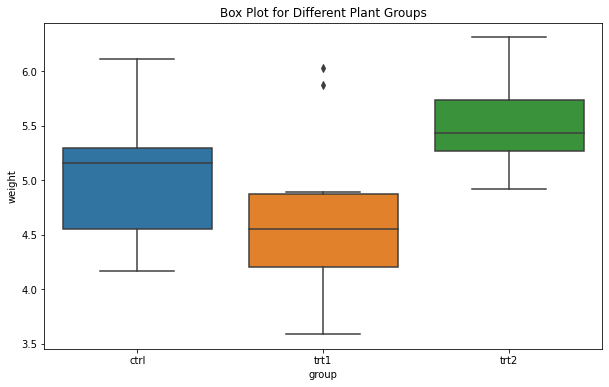

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(x='group', y='weight', data=df_plant)
plt.title('Box Plot for Different Plant Groups')
plt.show()